In [1]:
# 导入numpy库，用于进行科学计算
import numpy as np

# 导入matplotlib库，用于数据可视化
import matplotlib.pyplot as plt

# 导入scipy库，用于科学计算和工程计算
import scipy as sp

# 导入sympy库，用于符号数学计算
import sympy as sym

In [2]:
## 约定内容

decimalNumber = 6  ##小数位数

对于求解方程组而言,我们的讨论已经足以解决一大部分数值解的问题,而当我们将目光放到系数矩阵的计算时,发现问题变得比较复杂.  
`Definition`特征值与特征向量:  
设$A \in \mathbb{R}^{n \times n}$,$\lambda \in \mathbb{C}$和非零向量$x \in \mathbb{R}^n$满足$Ax = \lambda x$,则$\lambda$称为$A$的特征值,而$x$称为$A$的特征向量.  
因此,求解特征值就意味着求解等价问题:
$$
(A - \lambda I)x = 0
$$
在结束了特征值和特征向量定义后,我们再来补充一些特征值的性质:  
`Method1`线性运算性:
设$\lambda$为$A \in \mathbb{R}^{n \times n}$的特征值,则有:
1. c $\lambda$ 为c $A$ 的特征值
2. $\lambda - \mu$为$(A - \mu I)$的特征值
3. $\lambda^k$为$A^k$的特征值

`Method2`充要条件:
1. 矩阵$A$可相似对角化的充要条件是$A$有n个线性无关的特征向量.
2. 矩阵$A$的不同特征值构成的特征子空间正交,即不同特征值对应的特征向量正交.

`Method3`Rayleigh商估计:
1. $\lambda_1 \leq \lambda_2 \leq ... \leq \lambda_n$,则$\lambda_1 \leq \frac{(Ax,x)}{(x,x)} \leq \lambda_n$
2. $\lambda_1 = \min_{x \in \mathbb{R^n} , x \neq 0} \frac{(Ax,x)}{(x,x)}$,$ \lambda_n = \max_{x \in \mathbb{R^n} , x \neq 0} \frac{(Ax,x)}{(x,x)}$




In [3]:
def Rayleigh(A,x):
    """
    瑞利商定义

    Args:
        A (Matrix): 要求对称的系数矩阵
        x (vector): 特征向量

    Returns:
        float:瑞利商的值
    """
    
    b = np.dot(A,x)
    
    return np.dot(x,b)/np.dot(x,x)

In [4]:
A = np.array([
    [2,5,0],
    [5,3,7],
    [0,7,6]
])

lam,x = np.linalg.eig(A)

print(Rayleigh(A,x[2]))

-3.7754908865633916


# 矩阵幂法求特征值简介
矩阵幂法是一种迭代算法，主要用于求解特定类型矩阵（如幂等矩阵、对称正定矩阵等）的主特征值及其对应的特征向量。该方法尤其适用于当矩阵具有特殊性质时，能够简化计算过程并提高效率。下面简要介绍矩阵幂法的基本原理及步骤。

## 基本原理
矩阵幂法基于以下观察：若矩阵 $A$ 的最大特征值为 $\lambda_1$，对应的特征向量为 $\mathbf{v}_1$，那么对于任意非零初始向量 $\mathbf{x}_0$，通过重复乘以矩阵 $A$（即计算 $A^n\mathbf{x}_0$），得到的序列往往会趋近于 $\lambda_1^n\mathbf{v}_1$ 的方向。这是因为主特征值对应的特征向量在迭代过程中会被逐渐放大，而其他特征值对应的分量会相对减小。

## 步骤概述
* 选择初始向量：选取一个非零的初始向量 $\mathbf{x}_0$。

* 迭代计算：对于迭代次数 (n=1,2,...)，执行以下操作：

* 计算 $\mathbf{x}_n = A\mathbf{x}_{n-1}$。

* 归一化：为了防止数值溢出，每次迭代后通常需要将 $\mathbf{x}_n$ 归一化，即 $\mathbf{x}_n := \frac{\mathbf{x}_n}{||\mathbf{x}_n||}$。

* 终止条件：设定一个收敛准则，比如当两次迭代间的向量变化小于某个阈值时，停止迭代。

* 估计特征值：最后得到的向量近似为最大特征值对应的特征向量，可以通过 $\mathbf{x}_n^T A \mathbf{x}_n / (\mathbf{x}_n^T \mathbf{x}_n)$ 来估算主特征值 $\lambda_1$。

## 注意事项
* 矩阵幂法对初值敏感，不同的初始向量可能收敛到不同的特征值。
* 对于非幂等或非对称矩阵，此方法可能不会直接给出所有特征值，特别是对于复数特征值或接近的特征值情况。
* 为了提高收敛速度和稳定性，可以采用预处理技术，如对矩阵进行对角化近似或使用加速技术（如幂迭代的改进版，如反幂迭代、共轭梯度法等）。


In [5]:
def PowerMethod(A,v0 = None,isRayleigh = False,tol = 1e-6,max_iter = 150,output_key = False):
    """幂法求解矩阵特征值

    Args:
        A (Matrix): 系数矩阵
        v0 (vector, optional): 迭代初始变量, Defaults to None. If None,随机初始化.
        isRayleigh (bool, optional): 采用瑞利商计算最大值. Defaults to False.
        tol (float, optional): 精度限. Defaults to 1e-6.
        max_iter (int, optional): 最大迭代上限. Defaults to 150.
        putout_key (bool, optional): 输出迭代信息. Defaults to False.
    """
    
    A = A.copy()
    
    if v0 is None:
        v0 = np.random.rand(A.shape[0])
    else:
        v0 = v0.copy()
        
        
    u0 = v0
    
    oldmu = max(v0)
    
    i = 0
    
    while i < max_iter:
        
        v0 = A @ u0
        
        mu = max(v0)
        
        u0 = v0 / mu
        
        if(abs(mu - oldmu)<tol):
            break
        
        oldmu = mu
        
        i += 1
        
    if i < max_iter and output_key:
        
        if isRayleigh:
            mu = Rayleigh(A,u0)
            
        print(f"迭代{i+1}次收敛,特征值为:{mu},特征向量为:{u0}")
        
    elif i == max_iter and output_key:
        print(f"迭代{i+1}次未收敛,特征值为:{mu},特征向量为:{u0}")
        
        
    return mu,u0

In [6]:
A = np.array([
    [1.0,1.0,0.5],
    [1.0,1.0,0.25],
    [0.5,0.25,2.0]
])

lam,vec = PowerMethod(A,output_key=True)

## 原点平移法加速

p = 0.75

B = A - p*np.eye(A.shape[0])

lam1,vec1 = PowerMethod(B,output_key=True)

## 瑞利商加速

lam2,vec2 = PowerMethod(A,isRayleigh=True,output_key=True)

迭代21次收敛,特征值为:2.5365245903531584,特征向量为:[0.74822018 0.64966012 1.        ]
迭代16次收敛,特征值为:1.7865263954761899,特征向量为:[0.74822129 0.64966149 1.        ]
迭代26次收敛,特征值为:2.5365258604167025,特征向量为:[0.74822206 0.64966211 1.        ]


下面我们来介绍Householder变换，以及Householder变换的矩阵特征值计算
## 定义:
设向量$\omega \in \mathbb{R}^n$,且其满足$\omega^T\omega = 1$,即向量2-范数为1,称矩阵
$$
H(\omega) = I - 2\omega\omega^T
$$
为初等反射矩阵,称为Householder变换,如果设$\omega = (\omega_1,\cdots,\omega_n)^T$,则:
$$
H = \begin{bmatrix}
1 - 2\omega_1^2 & -2\omega_1\omega_2 & \cdots & -2\omega_1\omega_n \\
-2\omega_2\omega_1 & 1 - 2\omega_2^2 & \cdots & -2\omega_2\omega_n \\
\vdots & \vdots & \ddots & \vdots \\
-2\omega_n\omega_1 & -2\omega_n\omega_2 & \cdots &1 - 2\omega_n^2 
    \end{bmatrix}
$$

## 性质:
1. 正交性：Householder变换矩阵 $H$ 是正交矩阵，即 $H^TH = HH^T = I$，这意味着变换保持向量的内积不变，从而保持角度和长度的比例。

2. 对称性：$H$ 也是对称矩阵，即 $H = H^T$。

3. 反射性质：Householder变换实质上是一个关于通过原点的超平面的反射操作，这个超平面被向量 $\mathbf{v}$ 垂直切割，并且通过点 $\mathbf{v}$。

4. 特征值：由于 $H$ 是正交矩阵，其特征值为 $\pm1$，其中 $+1$ 的特征值对应于与超平面正交的向量，而 $-1$ 对应于被反射的向量。

In [7]:
def householder(omega):
    """
    Householder transformations,对整个向量执行变换

    Args:
        omega (vector): 传入向量 
    """
    
    n = omega.shape[0]
    
    x = omega.copy()
        
    sigma = np.sign(x[0]) * np.linalg.norm(x)
    
    e = np.zeros((n,1))
    
    e[0] = 1
    
    u = x + sigma * e
    
    beta = np.linalg.norm(u) ** 2 / 2  ##要求系数矩阵非奇异
    
    I = np.eye(n)
    
    H = I - u@u.T / beta
    
    return H

In [8]:
x = np.array([
    [0],
    [1]
])

y = np.array([
    [0.6],
    [0.8]
])

H = householder(x)

y_t = H @ y

x,y,y_t = x.reshape(-1),y.reshape(-1),y_t.reshape(-1)

y_t

array([ 0.6, -0.8])

Householder变换存在的目的即为将一个向量按照另一向量的垂直方向做镜像对应.  
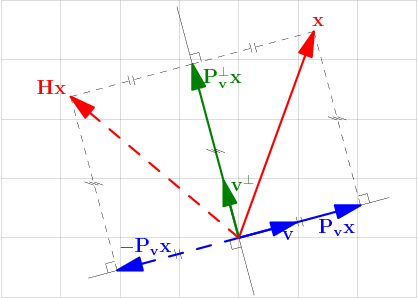  
这种操作可以将任一非零向量转换为空间内单位向量  
即:  
设$x = (x_1,\cdots,x_n)^T \neq 0$,则存在初等反射矩阵$H$使$Hx = -\sigma e_i$,其中
$$
\left\{
\begin{aligned}
    H & = I - \beta^{-1}uu^T \\
    \sigma & = sgn(x_i)\|x\|_2 \\
    u & = x + \sigma e_i \\
    \beta & = \frac{\|u\|_2^2}{2} 
\end{aligned}
\right.
$$
实际上,对于任意非零向量$x$,可以通过以下操作将其转化为另一已知向量$y$,只要满足$\|x\|_2 = \|y\|_2$  
只需要令$\omega = \frac{x-y}{\|x-y\|_2}$,此时,我们可以推出有:
$$
H = I - 2\omega \omega^T = I - 2\frac{(x-y)}{\|x-y\|_2} \frac{(x^T-y^T)}{\|x-y\|_2}, \\
Hx = x - 2\frac{(x-y)}{\|x-y\|_2} \frac{(xx^T-xy^T)}{\|x-y\|_2} = y.
$$


In [9]:
def householder_tran(x,y):
    """householder变换,将向量x变换到向量y

    Args:
        x (vector): 输入向量
        y (vector): 输入向量

    Returns:
        matrix: 输出变换矩阵H
    """
    x = x.copy()
    
    y = y.copy()
    
    n = np.linalg.norm(x - y)
    
    u = (x - y) / n
    
    I = np.eye(len(x))
    
    H = I - 2 * u @ u.T
    
    return np.around(H,decimals=3)

In [10]:
x = np.array([3,4,0]).reshape(-1,1)
y = np.array([0,0,5]).reshape(-1,1)

H = householder_tran(x,y)

H@x

array([[0.],
       [0.],
       [5.]])

# QR分解
在数值线性代数中，`QR分解`是一种重要的矩阵分解技术，它能将一个给定的矩阵$A$分解为一个正交矩阵$Q$和一个上三角矩阵$R$，即$A = QR$。其中，$Q$的列向量构成一组标准正交基，而$R$的对角线元素是非负的，且下三角部分为零。

## Householder变换法
`Householder变换`是实现QR分解的一种高效方法，特别适用于大矩阵。  
此方法通过构造一系列的Householder反射矩阵来逐步将原矩阵的列转换为正交向量，并最终形成上三角形式。每个Householder反射矩阵$H_i$是一个由向量$v_i$定义的对称和正交矩阵，满足$H_iv_i = e_1$，其中$e_1$是单位向量，其第一个分量为1，其余为0。变换过程保持了矩阵的欧几里得范数不变，但能有效地减少非对角元素，从而推动矩阵向三角形结构转化。

In [11]:
def QR_householder_decomposition(A,output_key=False):
    """采用Householder变换进行QR分解

    Args:
        A (matrix): 系数矩阵
        output_key (bool, optional): 输出控制. Defaults to False.
    """
    
    A = A.copy()
    
    n = A.shape[0]
    
    Q = np.eye(n)
    
    i = 0
    
    for x in A.T:
        
        y = x[i:].reshape(-1,1)
        
        H_i = householder(y)
        
        A[i:,i:] = H_i @ A[i:,i:]
        
        I_i = np.eye(i)
        
        H = np.block([
            [I_i,np.zeros((i,n-i))],
            [np.zeros((n-i,i)),H_i]
        ])
        
        Q = Q @ H
        
        i+=1
        
    D = np.eye(n)
    
    for i in range(n):
        D[i,i] = np.sign(A[i,i])
        
        
    Q = np.around(Q@D,decimals=decimalNumber)
    R = np.around(np.linalg.inv(D)@A,decimals=decimalNumber)
    
    if output_key:
        print(f"经过{i+1}次householder变换后,QR分解结果为:\nQ=\n{Q}\nR=\n{R},\nQR乘积为:\n{np.around(Q@R,decimals=4)}")
        
    return Q,R

In [12]:
A = np.array([[12, -51, 4],
              [6, 167, -68],
              [-4, 24, -41]]).astype(np.float32)

Q,R = QR_householder_decomposition(A,output_key = True)

经过3次householder变换后,QR分解结果为:
Q=
[[ 0.857143 -0.394286 -0.331429]
 [ 0.428571  0.902857  0.034286]
 [-0.285714  0.171429 -0.942857]]
R=
[[ 14.  21. -14.]
 [ -0. 175. -70.]
 [ -0.  -0.  35.]],
QR乘积为:
[[ 12.     -51.       4.    ]
 [  6.     167.     -68.    ]
 [ -4.      24.0001 -41.    ]]


`Householder Trans To Hessenberg Matrix`:  
通过householder变换进行同上文类似的过程即可将矩阵变换为上Hessenberg矩阵.

In [13]:
def householder_trans_hessenberg(A, output_key=False):
    """
    通过Householder变换将矩阵转换为Hessenberg矩阵。
    
    参数:
    A (matrix): 输入的矩阵。
    output_key (bool, optional): 是否输出变换过程的关键信息。默认为False。
    
    返回:
    tuple: 包含转换后的Hessenberg矩阵和变换矩阵U。
    """
    
    # 复制输入矩阵，以避免修改原始矩阵
    A = A.copy()
    # 获取矩阵的行数
    n = A.shape[0]
    # 初始化迭代变量i
    i = 1
    # 初始化单位矩阵U
    U = np.eye(n)
    # 当i小于行数时，循环执行Householder变换
    while i < n:
        # 获取当前列的下三角部分
        x = A[i:, i-1]
        # 将x转换为列向量
        c = x.reshape(-1, 1)
        # 调用Householder函数生成反射矩阵
        H_i = householder(c)
        # 初始化当前迭代的单位矩阵
        I_i = np.eye(i)
        # 构建当前迭代的变换矩阵
        U_i = np.block([
            [I_i, np.zeros((i, n-i))],
            [np.zeros((n-i, i)), H_i]
        ])
        # 应用变换矩阵更新A矩阵
        A = U_i @ A @ U_i
        # 更新U矩阵
        U = U_i @ U
        # 更新迭代变量i
        i += 1
        # 如果当前列为最后一列，则退出循环
        if i == n-1:
            break
    # 四舍五入保留指定小数位，避免浮点数误差
    A = np.around(A, decimals=decimalNumber)
    U = np.around(U, decimals=decimalNumber)
    # 如果输出关键信息选项为True，则输出变换后的矩阵
    if output_key:
        print(f"经过{i+1}次迭代,由householder变换生成的矩阵为:\n{A}")
    # 返回转换后的Hessenberg矩阵和变换矩阵U
    return A, U
        

In [14]:
A = np.random.random((4,4)).astype(np.float64)

print(A)

H,U = householder_trans_hessenberg(A,True)



[[0.41348758 0.26779061 0.588942   0.96901716]
 [0.13314941 0.94162291 0.56295816 0.79235096]
 [0.59408529 0.07539977 0.08570054 0.79058999]
 [0.72265067 0.45200717 0.98261111 0.53900923]]
经过4次迭代,由householder变换生成的矩阵为:
[[ 0.413488 -1.14908   0.135906  0.136758]
 [-0.944929  1.411054 -0.317248  0.098166]
 [ 0.       -0.920076  0.759002 -0.193724]
 [-0.       -0.       -0.06189  -0.603724]]


# Givens变换简介
Givens旋转是一种正交变换，常用于将一个二维子空间中的任意二维向量旋转至标准正交基。在数值线性代数中，它被广泛应用于QR分解、最小二乘问题求解以及矩阵对角化等过程中。Givens旋转通过构造一个2x2的旋转矩阵（即Givens旋转矩阵），可以有效地将给定向量的某一个分量“旋转”为0，从而简化计算。

# Givens旋转矩阵定义
对于二维空间中的两个向量$(a, b)^T$，Givens旋转矩阵$G$可以表示为：

$$ 
G(\theta) = \begin{pmatrix} 
                \cos(\theta) & -\sin(\theta) \\ \sin(\theta) & \cos(\theta)
                \end{pmatrix} 
$$

其中，$\theta$是旋转角度，满足以下条件之一（取决于需要消零的元素位置）：

使得$G(a, b)^T = (\rho, 0)^T$，此时$\rho$为向量的长度or使得$G^T(a, b)^T = (0, \rho)^T$。

# 应用场景
* QR分解：通过一系列的Givens旋转，可以将矩阵$A$分解为$Q$（正交矩阵）和$R$（上三角矩阵）。
* 最小二乘法：在最小二乘问题中，通过Givens旋转可以简化系数矩阵，进而高效求解正规方程组。
* 特征值问题：在某些特定的算法中，Givens变换也被用来辅助对矩阵进行对角化处理。




In [15]:
def givens_trans(n,i,j,theta):
    """生成Givens变换矩阵

    Args:
        n (int): 矩阵阶数
        i (int): 旋转1元素位置
        j (int): 旋转2元素位置
        theta (float): 旋转角度.
    """
        
    G = np.eye(n)
    
    G[i,i] = np.cos(theta)
    G[i,j] = np.sin(theta)
    G[j,i] = -np.sin(theta)
    G[j,j] = np.cos(theta)
    
    return G

In [16]:
def givens(x):
    """
    使用Givens旋转进行矩阵约化。

    通过一系列Givens旋转,将矩阵的下三角元素逐步转换为零,同时保持矩阵的上三角形式不变。
    这种方法常用于求解线性代数问题,如高斯消元法和QR分解等。

    参数:
    x: numpy.ndarray - 输入的二维数组，将被约化的矩阵。

    返回:
    numpy.ndarray - 用于约化的Givens旋转矩阵的乘积。
    """
    # 防止修改原矩阵，复制一份进行操作
    x = x.copy()
    # 获取矩阵的行数
    n = x.shape[0]
    # 初始化单位矩阵，用于记录旋转矩阵的乘积
    P = np.eye(n)
    # 选定第一个元素作为参考
    i = 0
    # 从第二行开始，逐行进行Givens旋转
    for j in range(1, n):
        # 计算Givens旋转的角度
        theta = np.arctan2(x[j] , x[i])
        # 构造Givens旋转矩阵
        P_i = givens_trans(n, i, j, theta)
        # 应用Givens旋转矩阵，更新矩阵x
        x = P_i @ x
        # 更新累积的旋转矩阵乘积
        P = P_i @ P
    # 返回最终的旋转矩阵乘积
    return P

In [17]:
x = np.array([
    [0.6]
]).astype(np.float32)

x = np.reshape(x,(-1,1))

P = givens(x)

In [18]:
def QR_givens_decomposition(A, output_key=False):
    """
    使用吉文斯变换进行QR分解。

    采用吉文斯变换逐步消去A的下三角部分,构造正交矩阵Q和上三角矩阵R,使得A = QR。

    参数:
    A (matrix): 需要进行QR分解的矩阵。
    output_key (bool): 是否输出变换过程的关键信息。默认为False。

    返回:
    Q (matrix): 正交矩阵。
    R (matrix): 上三角矩阵。
    """
    
    # 复制矩阵A，以免修改原矩阵
    A = A.copy()
    # 获取矩阵A的行数
    n = A.shape[0]
    # 初始化单位矩阵Q
    Q = np.eye(n)
    # 初始化索引i
    i = 0
    # 遍历矩阵A的列，进行吉文斯变换
    for j in range(n):
        # 获取当前列
        x = A.T[j]
        # 截取当前列的i之后的部分
        y = np.reshape(x[i:], (-1, 1))
        # 使用吉文斯变换构造旋转矩阵P_i
        P_i = givens(y)
        # 构造对应于已处理部分的单位矩阵
        I_i = np.eye(i)
        # 组合当前旋转矩阵和已处理部分的单位矩阵
        P = np.block([
            [I_i, np.zeros((i, n - i))],
            [np.zeros((n - i, i)), P_i]
        ])
        # 应用旋转矩阵P更新矩阵A
        A = P @ A
        # 更新正交矩阵Q
        Q = P @ Q
        # 更新索引i
        i += 1
    # 构造符号矩阵D，用于处理A的主对角线元素的符号问题
    D = np.eye(n)
    for i in range(n):
        D[i, i] = np.sign(A[i, i])
    # 计算矩阵R，通过D逆乘以A并四舍五入到指定精度
    R = np.around(np.linalg.inv(D) @ A, decimals=decimalNumber)
    # 计算矩阵Q，通过Q的转置乘以D并四舍五入到指定精度
    Q = np.around(Q.T @ D, decimals=decimalNumber)
    # 如果输出键被设置为True，输出变换结果和验证信息
    if output_key:
        print(f"矩阵经{i+1}次Givens列变换后,得到的分解为:\nQ:\n{Q}\nR:\n{R}\nQR乘积为:\n{np.around(Q @ R, decimals=0)}")
    # 返回正交矩阵Q和上三角矩阵R
    return Q, R

In [19]:
A = np.array([[12, -51, 4],
              [6, 167, -68],
              [-4, 24, -41]]).astype(np.float32)

Q,R = QR_givens_decomposition(A,output_key = True)

矩阵经3次Givens列变换后,得到的分解为:
Q:
[[ 0.857143 -0.394286 -0.331429]
 [ 0.428571  0.902857  0.034286]
 [-0.285714  0.171429 -0.942857]]
R:
[[ 14.        21.       -14.      ]
 [ -0.       174.999998 -69.999999]
 [  0.         0.        35.      ]]
QR乘积为:
[[ 12. -51.   4.]
 [  6. 167. -68.]
 [ -4.  24. -41.]]


下面我们来介绍由`Givens变换`实现矩阵变换为`上Hessenberg Matrix`

In [20]:
def givens_trans_hessenberg(A, output_key=False):
    """
    通过Givens变换将矩阵A转换为Hessenberg矩阵。
    
    Givens变换是一种用于消去矩阵中特定元素的线性代数技术。在这里,它被用于逐步将输入矩阵A转换为Hessenberg矩阵.
    Hessenberg矩阵是一种仅在对角线和次对角线以下有非零元素的矩阵,这有助于简化后续的矩阵操作。
    
    参数:
    A: 输入的矩阵。
    output_key: 布尔值，决定是否输出变换过程中的关键信息。
    
    返回:
    A: 经过Givens变换后的Hessenberg矩阵。
    U: 变换过程中累积的变换矩阵。
    """

    # 复制输入矩阵以避免修改原始数据
    A = A.copy()
    # 获取矩阵的行数
    n = A.shape[0]
    # 初始化单位矩阵，用于累积变换
    U = np.eye(n)
    # 初始化迭代变量i，从第二行开始迭代
    i = 1
    while i < n:
        # 提取矩阵A中第i行及以下、第i-1列的元素
        x = A[i:, i-1]
        # 将提取的元素reshape为列向量
        c = np.reshape(x, (-1, 1))
        # 使用Givens变换生成矩阵P_i
        P_i = givens(c)
        # 初始化单位矩阵I_i，用于变换的累积
        I_i = np.eye(i)
        # 构建用于本次变换的矩阵U_i
        U_i = np.block([
            [I_i, np.zeros((i, n-i))],
            [np.zeros((n-i, i)), P_i]
        ])
        # 应用U_i进行矩阵变换
        A = U_i @ A @ U_i
        # 累积变换矩阵U
        U = U @ U_i
        # 更新迭代变量i
        i += 1
        # 如果i等于n-1，说明已经完成所有迭代，跳出循环
        if i == n-1:
            break
    # 四舍五入保留指定小数位，以减少计算误差
    A = np.around(A, decimals=decimalNumber)
    U = np.around(U, decimals=decimalNumber)
    # 如果output_key为True，输出变换后的矩阵和迭代次数
    if output_key:
        print(f"经过{i+1}次迭代,由givens变换生成的矩阵为:\n{A}")
    # 返回变换后的矩阵A和累积的变换矩阵U
    return A, U

In [21]:
A = np.random.random((4,4)).astype(np.float32)

print(A)

G,U = givens_trans_hessenberg(A,output_key=True)

[[0.8354514  0.31338286 0.38499674 0.00245819]
 [0.98968697 0.519997   0.82320964 0.4009547 ]
 [0.6370738  0.8983282  0.8405053  0.5225077 ]
 [0.78116894 0.07071375 0.65841347 0.49765745]]
经过4次迭代,由givens变换生成的矩阵为:
[[ 0.835451  0.010024  0.296848 -0.397767]
 [ 1.412646 -0.516092  1.405695 -0.88336 ]
 [-0.        0.315766  0.401274 -0.287415]
 [-0.        0.        0.437381 -0.155472]]


当我们将矩阵约化为上Hessenberg矩阵后,其特征值我们将有一套很好的算法即QR方法来处理这一类问题.

In [22]:
import numpy as np

def QR_method(A, isSymmetric=False, output_key=False, tol=1e-5, max_iter=50):
    """
    使用QR方法计算矩阵的特征值和特征向量。

    参数:
    A: 输入的矩阵。
    isSymmetric: 布尔值,指示矩阵是否对称。默认为False。
    output_key: 布尔值,控制是否打印计算结果。默认为False。
    tol: 浮点数,迭代停止的容差。默认为1e-5。
    max_iter: 整数,最大迭代次数。默认为50。

    返回:
    如果矩阵是对称的，返回特征值数组和特征向量数组。
    如果矩阵不是对称的，只返回特征值数组。
    如果迭代次数达到最大值而无法收敛,则返回None。
    """

    # 检查输入的矩阵是否合法
    if not isinstance(A, np.ndarray) or A.ndim != 2 or A.size == 0:
        raise ValueError("输入的A必须是一个非空的二维NumPy数组。")

    # 复制输入矩阵以避免修改原矩阵
    A = A.copy()

    # 检查矩阵是否是对称的，如果是，则设置标志为True
    isSymmetric = np.allclose(A, A.T, atol=1e-10, rtol=0)

    # 获取矩阵的维度
    n = A.shape[0]

    # 如果矩阵是对称的，初始化单位矩阵作为特征向量矩阵
    if isSymmetric:
        U = np.eye(n)

    # 将输入矩阵转换为Hessenberg矩阵
    A, _ = householder_trans_hessenberg(A)

    # 定义一个函数来计算矩阵上三角部分元素的平方和
    def sum_of_upper_triangular(A):
        return np.sum(np.square(A[np.triu_indices_from(A, k=1)]))

    # 定义一个函数来提取矩阵的对角线元素
    def diagonal(A):
        return A.diagonal()

    # 初始化迭代次数
    i = 0
    # 开始迭代
    while i < max_iter:
        if max_iter <= 0:
            raise ValueError("max_iter必须大于0。")

        # 获取当前迭代的最后一个元素
        s_i = A[-1, -1]
        # 初始化单位矩阵
        I_i = np.eye(n)
        # 进行QR分解
        Q, R = QR_householder_decomposition(A)
        # 如果矩阵是对称的，更新特征向量矩阵
        if isSymmetric:
            U = U @ Q
        # 更新矩阵A
        A = R @ Q
        # 增加迭代次数
        i += 1
        # 检查是否满足停止条件
        if sum_of_upper_triangular(A) < tol:
            break

    # 检查是否达到最大迭代次数而无法收敛
    if i == max_iter:
        print("迭代次数过多，无法收敛")
        return None
    else:
        # 提取特征值和特征向量，注意直接使用np.round以避免未定义的decimalNumber变量
        A = np.round(A, decimals=5)
        A = diagonal(A)
        if isSymmetric:
            U = np.round(U, decimals=5)
            eigvector = U
            eigvalue = A
            
            if output_key:
                print(f"特征向量为:\n{eigvector},\n特征值为:\n{eigvalue}")
            return eigvalue, eigvector
        else:
            eigvector = []
            eigvalue = A
            
            if output_key:
                print(f"特征值为:\n{eigvalue}")
            return eigvalue, eigvector

In [23]:
A = np.array([
    [2,1,0],
    [1,3,0],
    [0,0,4]
]).astype(float)

eigvalue,eigvector = QR_method(A,output_key=True)



特征向量为:
[[ 0.52635  0.85026  0.     ]
 [-0.85026  0.52635  0.     ]
 [ 0.       0.       1.     ]],
特征值为:
[3.61803 1.38197 4.     ]


上机练习1:  
利用householder变换约化矩阵:
$$
A = \begin{pmatrix}
        1 & 3 & 4 \\
        3 & 1 & 5 \\
        4 & 2 & 1
    \end{pmatrix}
$$
为上Hessenberg矩阵$H$,求出反射矩阵$P$使得
$H = PAP$

In [24]:
A = np.array([
    [1,3,4],
    [3,1,5],
    [4,2,1]
]).astype(np.float64)

H,P = householder_trans_hessenberg(A)

print(f"经householder约化后矩阵\n{A}\n变换为:\n{H},\n其反射矩阵\n{P}\n")

经householder约化后矩阵
[[1. 3. 4.]
 [3. 1. 5.]
 [4. 2. 1.]]
变换为:
[[ 1.   -5.    0.  ]
 [-5.    4.36 -0.52]
 [ 0.    2.48 -2.36]],
其反射矩阵
[[ 1.   0.   0. ]
 [ 0.  -0.6 -0.8]
 [ 0.  -0.8  0.6]]



上机练习2:  
用幂法、反幂法计算矩阵最大最小特征值对,以及QR算法计算
$$
A = \begin{pmatrix}
        1 & 1 & 1/2 \\
        1 & 1 & 1/4 \\
        1/2 & 1/4 & 2
    \end{pmatrix}
$$
的所有特征值和特征向量

In [25]:
A = np.array([
    [1, 1, 1/2],
    [1, 1, 1/4],
    [1/2, 1/4, 2]
]).astype(np.float64)

lambda1 = PowerMethod(A)

print(f"由幂法得到的特征值:\n{lambda1}\n")

eigvalue,eigvector = QR_method(A)

print(f"由QR方法得到的特征值:\n{eigvalue}\n,特征向量\n{eigvector}\n")

由幂法得到的特征值:
(2.5365245020507396, array([0.74822011, 0.64966005, 1.        ]))

由QR方法得到的特征值:
[ 2.53652  1.48013 -0.01665]
,特征向量
[[ 0.53247  0.44309 -0.72121]
 [-0.73085 -0.18916 -0.65581]
 [ 0.42701 -0.87629 -0.22311]]



书面作业2:  
用幂法计算下列矩阵的主特征值和特征向量
$$
A = \begin{pmatrix}
        7 & 3 & -2 \\
        3 & 4 & -1 \\
        -2 & -1 & 3 
    \end{pmatrix}
$$

In [26]:
A =np.array([
    [7,3,-2],[3,4,-1],[-2,-1,3]
]).astype(np.float64)

lamb = PowerMethod(A)
    
print(lamb)

(9.60555157607056, array([ 1.        ,  0.60555136, -0.39444863]))


在完成了本章全部的课本内容后,我们来介绍一类由矩阵特征值分解(`EVD`)所拓展出的矩阵奇异值分解(`SVD`).  
其基本原理大概如下:  
对于一个方阵而言,如果他不是`singular`的,那么他一定能够进行对角化,即对
$$
\forall A \in \mathbb{R}^{n \times n},\quad \exists P,P^{-1} \in \mathbb{R}^{n \times n} \quad \text{s.t.} \quad A = PDP^{-1}
$$
但是这个过程具有一定的限制,即矩阵$A$必须为方阵,因此对于任意矩阵$A$而言,我们该如何操作去分解矩阵呢?  
由高等代数内容易知,对于
$$
\forall A \in \mathbb{R}^{m \times n},\quad A^T \in \mathbb{R}^{n \times m}
$$
我们可以通过矩阵$A^TA$来求解$A$的`EVD`(称为矩阵的右奇异分解),因此我们可以通过
$$
\forall A \in \mathbb{R}^{m \times n},\quad A^TA \in \mathbb{R}^{n \times n}
$$
来求解$A$的`SVD`.

`奇异值分解(SVD)`过程

假设我们有一个$m \times n$的矩阵$A$,SVD将它分解为三个矩阵的乘积:

$$ A = U \Sigma V^T $$

其中:

1. $U$是一个$m \times m$的单位正交矩阵,其列是矩阵$A$的左奇异向量.
2. $\Sigma$是一个$m \times n$的对角矩阵,对角线上的元素是非负实数,称为奇异值.如果$A$是方阵,$\Sigma$也是方阵;否则,$\Sigma$的非对角部分都是零.
3. $V$是一个$n \times n$的单位正交矩阵,其列是矩阵$A$的右奇异向量.

SVD的计算步骤如下:

1. 找到特征值和特征向量:
    * 首先,计算$AA^T$和$A^TA$,得到两个对称矩阵,
    * 然后,找出这两个矩阵的特征值和对应的特征向量,
    *  对于$AA^T$,特征向量构成$U$的列;对于$A^TA$,特征向量构成$V$的列.

2. 排序奇异值:
    * 将$AA^T$和$A^TA$的特征值按照非降序排列,这些值就是$\Sigma$的对角线元素.
    * 如果$A$不是方阵,只保留前$m$个特征值(对应$AA^T$)or前$n$个特征值(对应$A^TA$).

3. 标准化特征向量:
    * 将$U$和$V$的特征向量归一化,确保它们都是单位向量.

4. 构造$\Sigma$:
    * 创建一个$m \times n$的零矩阵,然后将排序后的奇异值填入对角线.

5. 构建最终矩阵:
    * 将$U$、$\Sigma$和$V^T$组合起来,得到最终的SVD表示.

In [27]:
import numpy as np

def normalize(v):
    """
    标准化向量
    """
    return v / np.linalg.norm(v)

def singular_value_decomposition(A, output_key=False):
    """
    对矩阵A进行奇异值分解
    """
    # 检查输入矩阵是否为空或非法
    if not A.size:
        raise ValueError("输入矩阵不能为空")
    if A.ndim != 2:
        raise ValueError("输入必须是二维矩阵")
    
    # 复制矩阵以避免修改原始数据
    A = A.copy()
    
    m, n = A.shape
    
    # 计算A的平方和转置的平方，用于后续计算
    A1 = A @ A.T
    A2 = A.T @ A
    
    # 使用eig计算特征值和特征向量
    A1_eigenvalues, A1_eigenvectors = np.linalg.eig(A1)
    A2_eigenvalues, A2_eigenvectors = np.linalg.eig(A2)
    
    # 对特征值进行排序
    A1_eigenvalues = np.sort(A1_eigenvalues)[::-1]
    A2_eigenvalues = np.sort(A2_eigenvalues)[::-1]
    
    # 初始化sigma矩阵
    sigma = np.zeros_like(A)
    
    # 根据m和n的大小关系，填充sigma矩阵
    if m > n:
        for i in range(n):
            sigma[i, i] = np.sqrt(A2_eigenvalues[i])
    elif m < n:
        for i in range(m):
            sigma[i, i] = np.sqrt(A1_eigenvalues[i])
    else:
        # 当m等于n时，两种情况下取均值以保证对称性
        for i in range(m):
            sigma[i, i] = (np.sqrt(A1_eigenvalues[i]) + np.sqrt(A2_eigenvalues[i])) / 2
    
    # 标准化特征向量
    for i in range(m):
        A1_eigenvectors[i, :] = normalize(A1_eigenvectors[i, :])
        
    for i in range(n):
        A2_eigenvectors[i, :] = normalize(A2_eigenvectors[i, :])
        
    # 构造U和V矩阵
    U = A1_eigenvectors
    V = A2_eigenvectors.T
    
    # 根据output_key的值，决定是否打印结果
    if output_key:
        print(f"矩阵奇异值分解结果为:\nU:\n{U}\nSigma:\n{sigma}\nV:\n{V}")
    
    return U, sigma, V

In [28]:
A = np.random.random((4,3)).astype(np.float32)

U,sigma,V = singular_value_decomposition(A,True)

print(A)

print(U@sigma@V.T)

矩阵奇异值分解结果为:
U:
[[-0.3246607  -0.5155352  -0.7648627   0.209294  ]
 [-0.6012263  -0.13630836  0.1348063  -0.7757411 ]
 [-0.6887628   0.5789996   0.02134635  0.43578637]
 [-0.24233925 -0.61676824  0.62956864  0.4056008 ]]
Sigma:
[[1.3855603  0.         0.        ]
 [0.         0.64892375 0.        ]
 [0.         0.         0.22104718]
 [0.         0.         0.        ]]
V:
[[-0.6011301  -0.30293903 -0.73950696]
 [-0.5940739  -0.4495502   0.6670688 ]
 [ 0.5345267  -0.84031695 -0.09027001]]
[[0.11907249 0.43819326 0.33199558]
 [0.35161263 0.24960127 0.7384059 ]
 [0.8317345  0.01667693 0.6075528 ]
 [0.04117104 0.47834954 0.22463039]]
[[ 0.49678567  0.30484843  0.05593433]
 [ 0.50552243  0.55452657 -0.37364033]
 [ 0.45636028  0.40117761 -0.82626617]
 [ 0.22017881  0.47223374  0.14428131]]
